In [1]:
%cd /projappl/project_2006327/Detectron/2025/satellite_dataset

/projappl/project_2006327/Detectron/2025/satellite_dataset


In [2]:
import os
import json
import matplotlib.pyplot as plt

In [3]:
# Path to your metrics.json file
#/projappl/project_2006327/Detectron/2025/dataset/output/faster_rcnn/coco_data_test
metrics_file = "output/A001/coco_data_test/metrics.json"  # <-- Change this to your actual path

In [4]:
# Initialize lists to store data
iterations = []
total_loss = []

In [5]:
with open(metrics_file, "r") as f:
    for line in f:
        data = json.loads(line)
        print(data.keys())  # Check available keys
        break  # Stop after first line to inspect structure

dict_keys(['data_time', 'eta_seconds', 'fast_rcnn/cls_accuracy', 'fast_rcnn/false_negative', 'fast_rcnn/fg_cls_accuracy', 'iteration', 'loss_box_reg', 'loss_cls', 'loss_rpn_cls', 'loss_rpn_loc', 'lr', 'rank_data_time', 'roi_head/num_bg_samples', 'roi_head/num_fg_samples', 'rpn/num_neg_anchors', 'rpn/num_pos_anchors', 'time', 'total_loss'])


Loss curve saved to output/total_loss_curves/A001_curves.png


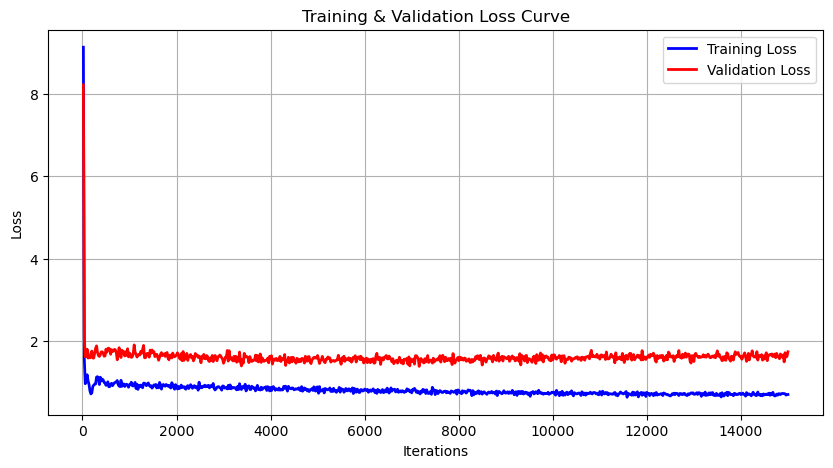

In [6]:
import os
import json
import matplotlib.pyplot as plt

# Ensure the output directory exists
output_dir = "output/total_loss_curves"
os.makedirs(output_dir, exist_ok=True)

# Initialize lists
iterations = []
total_loss = []
val_loss = []

# Load the metrics.json file
with open(metrics_file, "r") as f:
    for line in f:
        data = json.loads(line)
        if "total_loss" in data and "iteration" in data:
            iterations.append(data["iteration"])
            total_loss.append(data["total_loss"])
        if "val_total_loss" in data:
            val_loss.append(data["val_total_loss"])

# Check if data was found
if not iterations:
    print("No training loss data found.")
else:
    # Plot training and validation loss curves
    plt.figure(figsize=(10, 5))
    plt.plot(iterations, total_loss, label="Training Loss", color="blue", linewidth=2)
    
    if val_loss:
        plt.plot(iterations[:len(val_loss)], val_loss, label="Validation Loss", color="red", linewidth=2)
    
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title("Training & Validation Loss Curve")
    plt.legend()
    plt.grid(True)
    
    # Save the figure
    save_path = os.path.join(output_dir, "A001_curves.png")
    plt.savefig(save_path, dpi=300, bbox_inches="tight")
    print(f"Loss curve saved to {save_path}")
    
    # Show the plot
    plt.show()
